In [ ]:
%reload_ext autoreload
%autoreload 2

### Scores for bias Gen

./Final_Test_MetricsBase_CNN_Part2_unbiased.npz
           precision  recall  f1-score   accuary
cloth       0.856410   0.835  0.845570  0.866228
no_face     0.871287   0.880  0.875622  0.889381
surgical    0.844560   0.815  0.829517  0.854348
n95         0.855000   0.855  0.855000  0.873362
incorrect   0.871429   0.915  0.892683  0.903084
Overall acc:  0.86


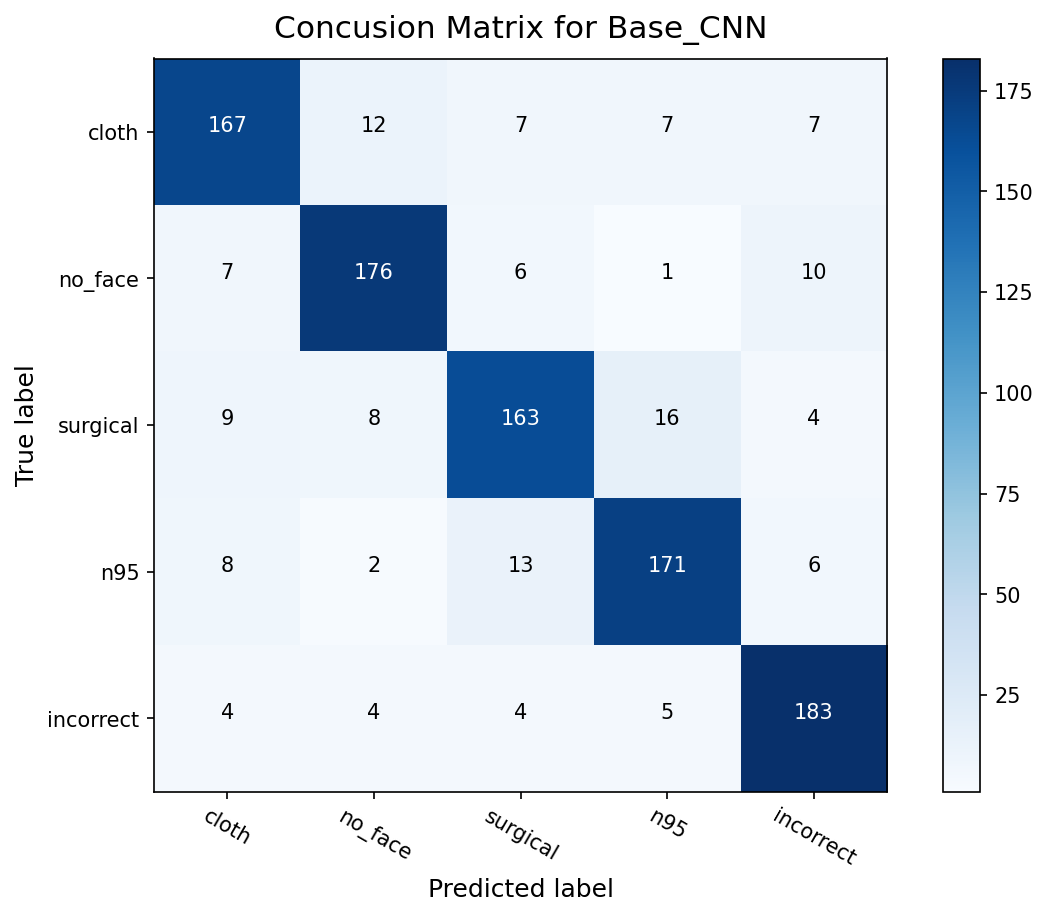

./Final_Test_MetricsBase_CNN_Part2_unbiased.npz
              precision    recall  f1-score   accuary bias(fm - m)
cloth_m        0.900000  0.900000  0.900000  0.909091             
cloth_fm       0.819048  0.781818  0.800000  0.833333   -0.0757576
no_face_m      0.936842  0.881188  0.908163  0.915888             
no_face_fm     0.813084  0.878788  0.844660  0.865546   -0.0503416
surgical_m     0.842105  0.879121  0.860215  0.877358             
surgical_fm    0.846939  0.761468  0.801932  0.834677   -0.0426811
n95_m          0.869565  0.869565  0.869565  0.884615             
n95_fm         0.842593  0.842593  0.842593  0.864000   -0.0206154
incorrect_m    0.869565  0.888889  0.879121  0.892157             
incorrect_fm   0.872881  0.936364  0.903509  0.912000    0.0198431
Overall acc:  0.86


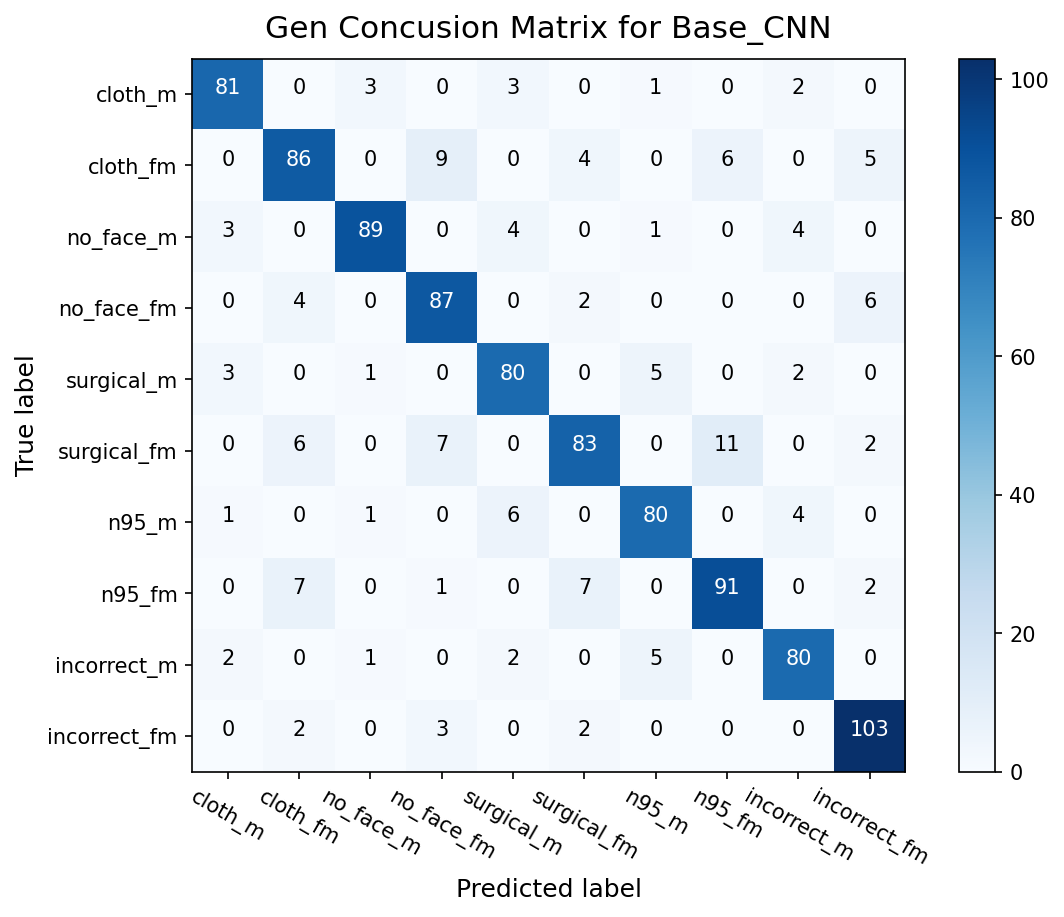

./Final_Test_MetricsBase_CNN_Part2_unbiased.npz
                precision    recall  f1-score   accuary bias(afar - caas)
cloth_caas       0.794872  0.775000  0.784810  0.822917                  
cloth_afar       0.948718  0.925000  0.936709  0.940476           0.11756
no_face_caas     0.821429  0.876190  0.847926  0.868000                  
no_face_afar     0.933333  0.884211  0.908108  0.915842         0.0478416
surgical_caas    0.780702  0.741667  0.760684  0.806897                  
surgical_afar    0.936709  0.925000  0.930818  0.935294          0.128398
n95_caas         0.800000  0.800000  0.800000  0.833333                  
n95_afar         0.937500  0.937500  0.937500  0.941176          0.107843
incorrect_caas   0.873239  0.885714  0.879433  0.892405                  
incorrect_afar   0.867647  0.983333  0.921875  0.927536         0.0351312
Overall acc:  0.86


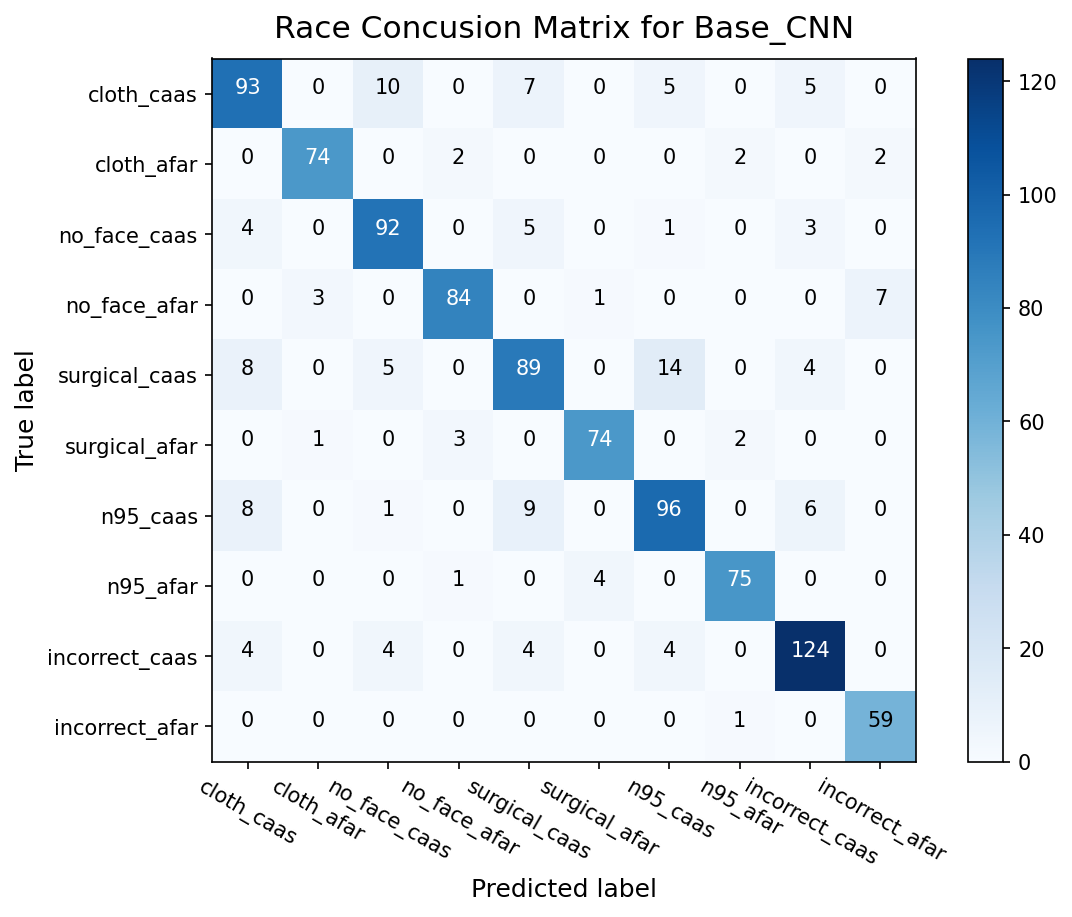

In [4]:
import evaluation

metrics_file_path = './Final_Test_MetricsBase_CNN_Part2_unbiased.npz'

evaluation.read_socres(metrics_file_path, conf_m_title='Concusion Matrix for Base_CNN')
evaluation.read_socres_gen(metrics_file_path, conf_m_title='Gen Concusion Matrix for Base_CNN')
evaluation.read_socres_race(metrics_file_path, conf_m_title='Race Concusion Matrix for Base_CNN')

In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import label_map_new
from data_process.DatasetHelper import ImageDataset

data = ImageDataset('./data/aug_3')
data_loader = torch.utils.data.DataLoader(data, batch_size=100000, shuffle=True, num_workers=1)

for data, labels in data_loader:
    data_X, data_y = data.float(), labels
    
data_y = data_y.numpy()

label: 0 with 1000 images, named as "cloth_mask"
label: 1 with 1000 images, named as "no_face_mask"
label: 2 with 1000 images, named as "surgical_mask"
label: 3 with 1000 images, named as "n95_mask"
label: 4 with 1000 images, named as "mask_worn_incorrectly"


In [2]:
from evaluation import downgrade_argmax_target_to_gen, mask_label_name_list
from data_process.DatasetHelper import label_map_new_gen

gen_label_list = [downgrade_argmax_target_to_gen(y) for y in data_y]

d = {}

for l in gen_label_list:
    l_name = label_map_new_gen[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

gen_arr = {'m': [d[mask_male_label] for mask_male_label in [l + '_m' for l in mask_label_name_list]], 
           'fm': [d[mask_male_label] for mask_male_label in [l + '_fm' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(gen_arr['fm'][i] - gen_arr['m'][i])
    
gen_arr['bias(fm - m)'] = bias

import pandas as pd
df = pd.DataFrame(data=gen_arr, index=mask_label_name_list)

df

{'mask_worn_incorrectly_m': 453, 'surgical_mask_fm': 544, 'no_face_mask_fm': 496, 'cloth_mask_fm': 550, 'no_face_mask_m': 504, 'n95_mask_m': 461, 'n95_mask_fm': 539, 'surgical_mask_m': 456, 'mask_worn_incorrectly_fm': 547, 'cloth_mask_m': 450}


,m,fm,bias(fm - m)
cloth_mask,450,550,100
no_face_mask,504,496,-8
surgical_mask,456,544,88
n95_mask,461,539,78
mask_worn_incorrectly,453,547,94


In [3]:
from evaluation import downgrade_argmax_target_to_race, mask_label_name_list
from data_process.DatasetHelper import label_map_new_race
race_label_list = [downgrade_argmax_target_to_race(y) for y in data_y]

d = {}

for l in race_label_list:
    l_name = label_map_new_race[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

race_arr = {'caas': [d[mask_male_label] for mask_male_label in [l + '_caas' for l in mask_label_name_list]], 
           'afar': [d[mask_male_label] for mask_male_label in [l + '_afar' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(race_arr['afar'][i] - race_arr['caas'][i])
    
race_arr['bias(afar - caas)'] = bias

import pandas as pd
df = pd.DataFrame(data=race_arr, index=mask_label_name_list)

df

{'mask_worn_incorrectly_afar': 300, 'surgical_mask_caas': 600, 'no_face_mask_caas': 525, 'cloth_mask_caas': 600, 'no_face_mask_afar': 475, 'mask_worn_incorrectly_caas': 700, 'n95_mask_afar': 400, 'surgical_mask_afar': 400, 'cloth_mask_afar': 400, 'n95_mask_caas': 600}


,caas,afar,bias(afar - caas)
cloth_mask,600,400,-200
no_face_mask,525,475,-50
surgical_mask,600,400,-200
n95_mask,600,400,-200
mask_worn_incorrectly,700,300,-400
